<a href="https://colab.research.google.com/github/Adriano181/folio/blob/main/Ejercicio%20de%20graficos%20con%20database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_excel('/content/ventas_powerbi.xlsx')

In [11]:
# dar print para conocer datos  dentro de xlsx
print(df.head())

       Fecha    Categoría Producto Región  Total Ventas
0 2023-05-06  Electrónica   Laptop   Este        127.14
1 2023-10-30  Electrónica   Cámara  Norte        222.52
2 2023-04-30  Electrónica   Laptop    Sur        262.57
3 2023-11-29  Electrónica   Cámara    Sur        356.64
4 2023-10-29     Juguetes   Muñeca  Oeste        153.53


# New Section

/tmp/ipython-input-178881317.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="Región", y="Total Ventas", palette="Set2")


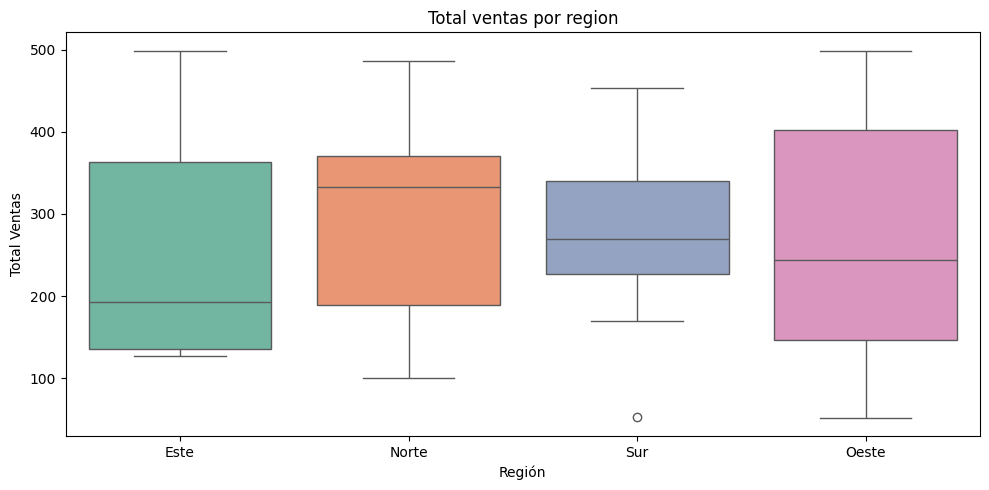

In [9]:
#boxspot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x="Región", y="Total Ventas", palette="Set2")
plt.title("Total ventas por region")
plt.tight_layout()
plt.show()

In [13]:
#mapedo de variables tipo de texto para crear corelaction

categoria_mapeo ={"Electrónica":1,
                  "Hogar":2,
                  "Ropa":3,
                  "Juguetes":4,
                  "libros":5
                  }


region_mapeo={"Norte":1,
              "Sur":2,
              "Este":3,
              "Oeste":4
              }

In [14]:
df["categoria_map"]=df['Categoría'].map(categoria_mapeo)
df["region_map"]=df['Región'].map(region_mapeo)

In [15]:
print(df.describe())

                     Fecha  Total Ventas  categoria_map  region_map
count                   50     50.000000      38.000000   50.000000
mean   2023-06-25 03:50:24    274.941600       2.210526    2.340000
min    2023-01-17 00:00:00     51.770000       1.000000    1.000000
25%    2023-03-14 18:00:00    161.472500       1.000000    1.000000
50%    2023-05-21 00:00:00    269.995000       2.500000    2.000000
75%    2023-10-28 12:00:00    369.870000       3.000000    3.000000
max    2024-01-01 00:00:00    498.720000       4.000000    4.000000
std                    NaN    127.544403       1.189092    1.135872


In [16]:
#como crear elmapa de calor
df_mun=df.select_dtypes(include=['float64','int64'])
print(df_mun)

    Total Ventas  categoria_map  region_map
0         127.14            1.0           3
1         222.52            1.0           1
2         262.57            1.0           2
3         356.64            1.0           2
4         153.53            4.0           4
5         153.38            1.0           4
6         202.37            3.0           1
7         370.27            2.0           3
8         284.98            NaN           4
9          53.39            NaN           2
10        435.91            3.0           1
11        420.37            4.0           4
12        341.68            3.0           3
13        369.98            1.0           2
14        494.97            3.0           4
15        129.94            NaN           3
16         51.77            1.0           4
17        259.63            NaN           2
18        138.38            4.0           3
19        225.65            NaN           3
20        498.72            NaN           3
21        382.78            3.0 

In [17]:
#crear lamatriz de corhelacion
correl=df_mun.corr()
print(correl)

               Total Ventas  categoria_map  region_map
Total Ventas       1.000000      -0.010565   -0.110201
categoria_map     -0.010565       1.000000    0.157591
region_map        -0.110201       0.157591    1.000000


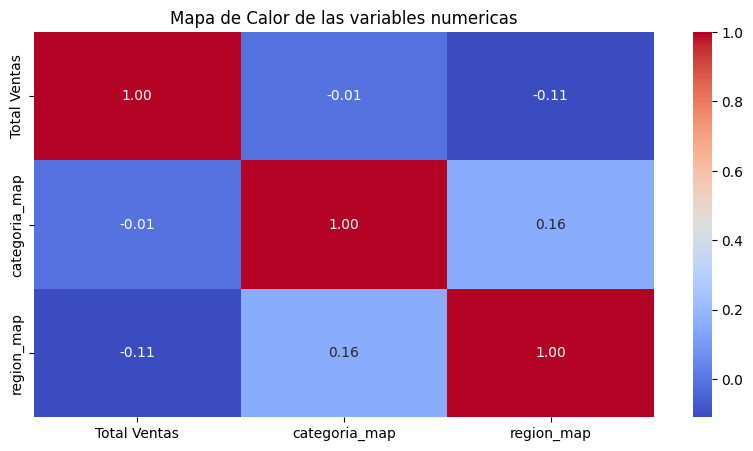

In [21]:
# grafico de calor
plt.figure(figsize=(10,5))
sns.heatmap(correl,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Mapa de Calor de las variables numericas")
plt.show()